# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most. More precisely, the first eigenvector is the direction in which the data varies the most, the second eigenvector is the direction of greatest variance among those that are orthogonal (perpendicular) to the first eigenvector, the third eigenvector is the direction of greatest variance among those orthogonal to the first two, and so on. The objective of this experiment is to visualize the effect of eigen values for different covariance matrices.
  

###Importing required packages

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

###Getting Eigen vectors and Eigen values

The below is the function to get eigen vectors and eigen values from the mean corrected data.

In [ ]:
def get_eigen(data):
    mu = data.mean(axis=0)
    data_mean_corrected = data - mu
    eigenvectors, eigenvalues, V = np.linalg.svd(data_mean_corrected.T, full_matrices=False)
    projected_data = np.dot(data_mean_corrected, eigenvectors)
    sigma = projected_data.std(axis=0).mean()
    return mu, eigenvectors, eigenvalues

###Plotting Eigen vectors

The below function is for plotting eigen vectors

In [ ]:
def plot_eigen(data, mu, eigenvectors, name):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    #plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.plot(data[:,0],data[:,1], 'r*', markersize=12)
    for index, axis in enumerate(eigenvectors):
        d = np.vstack((mu - 12 * axis, mu + 12 * axis))
        plt.plot(d[:,0], d[:,1], label = 'Eigen Vector '+str(index+1))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.title(name)
    plt.legend()
    plt.savefig(name+'.png')

In this case study, each data sample is a 2 dimensional point with coordinates x, y taken from the normal distribution with specified mean and variance. We will see the plot of the two eigenvectors of the covariance matrix of these data samples and the eigenvalues are the length of the arrows.

We can see from the below plots that the first eigenvector points (from the mean of the data) in the direction in which the data varies the most, and the second eigenvector is orthogonal (perpendicular) to the first.


###Equal Eigen values $\lambda_{1} = \lambda_{2}$


For the data with mean = $[0,0]$ and covariance $[[1,0],[0,1]]$, we can visualize the below eigen vectors. Here, both the eigen values are equal and the distribution is circular.


[32.36620582 31.05522935]


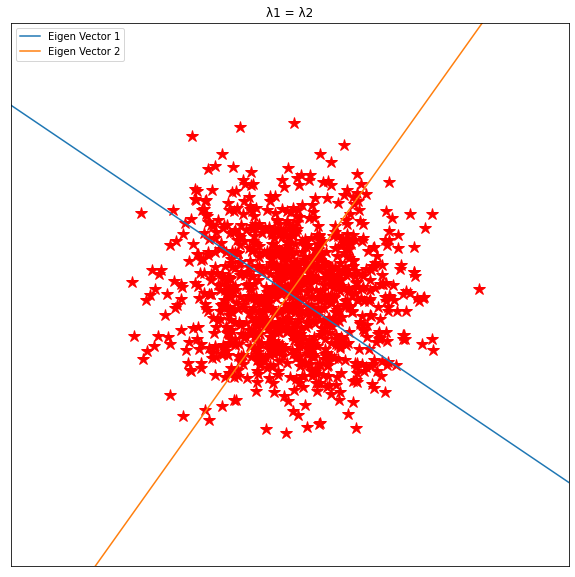

In [ ]:
mean = [0, 0]
cov = [[1,0], [0,1]]
data = np.random.multivariate_normal(mean, cov, 1000)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB"+'1 = '+u"\u03BB" +'2')
print(eigenvalues)

###Unequal Eigen values $\lambda_{1} \neq \lambda_{2}$


For the data with mean = $[0,0]$ and covariance $[[0.8,0.5], [0.2,0.2]]$, we can visualize the below eigen vectors. Here, one eigen value is greater than the other and the distribution is elongated in the direction of that eigen vector.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


[10.55712907  2.2988869 ]


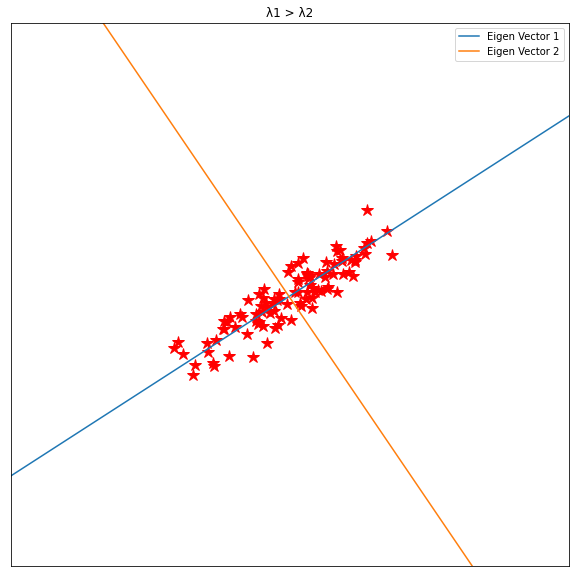

In [ ]:
mean = [0, 0]
cov = [[0.8,0.5], [0.2,0.2]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors,u"\u03BB"+'1 > '+u"\u03BB" +'2')
print(eigenvalues)

### One of the Eigen values is zero, $\lambda_{1} = 0$

For the data with mean = $[0,0]$ and covariance $[[0,0], [0,1]]$, we can visualize the below eigen vectors. Here, only one Eigen value is non-zero, distribution of data will align on that Eigen vector and the distribution is along vertical axis.

[11.29262624  0.        ]


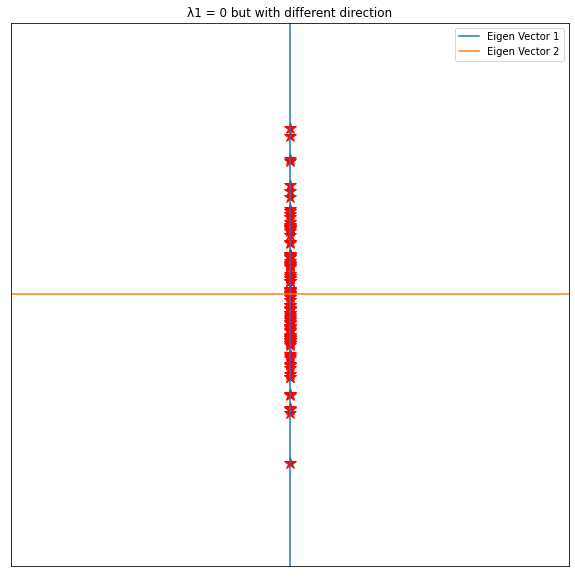

In [ ]:
mean = [0, 0]
cov = [[0,0], [0,1]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB" +'1 = 0 but with different direction')
print(eigenvalues)

### One of the Eigen values is zero, $\lambda_{2} = 0$

For the data with mean = $[0,0]$ and covariance $[[1,0], [0,0]]$, we can visualize the below eigen vectors. Here, only one Eigen value is non-zero, distribution of data will align on that Eigen vector and the distribution is along horizontal axis.


[9.2684662 0.       ]


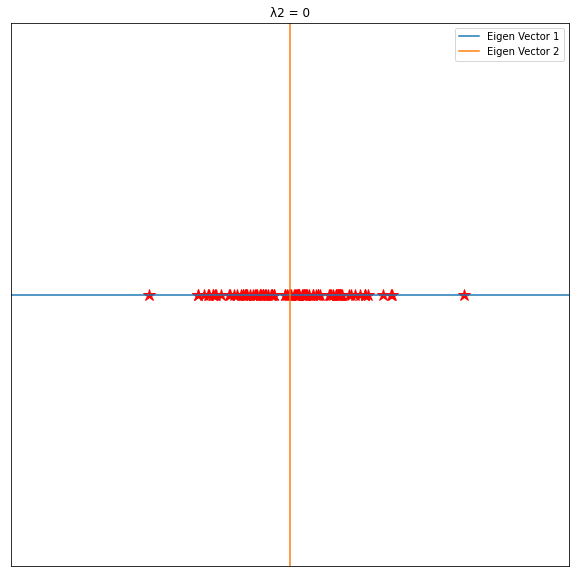

In [ ]:
mean = [0, 0]
cov = [[1,0], [0,0]]
data = np.random.multivariate_normal(mean, cov, 100)
mu, eigenvectors, eigenvalues = get_eigen(data)
plot_eigen(data, mu, eigenvectors, u"\u03BB" +'2 = 0')
print(eigenvalues)